# Introduction to Data Science



## Instructor

    Dr. Fatima Boukari
    Division: PEMaCS
    
    
# Homework5: 

#### due Wednesday, November 23rd at 11:59 pm.

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

Problem:
In this homework, we apply the k-means-clustering algorithm on soccerPlayers, `Soccer.csv` dataset. The features we will use for this project are: features = ["Total", "Potential", "Player_Salary_eur", "Player_Worth_eur", "age"]. 

Apply clustering and visualize the clusters and their centroids using k=3, k=6 and k=12.
We need to visualize our features in 2 dimensions, so, you can use 2 features to visualize your clusters. In the next Homework, we will apply PCA to reduce the number of features from 5 to 2 features and visualize our clusters for different values of k. 




- 1. Import the necessary libraries


- 2.Read the dataset
soccer = pd.read_csv("Soccer.csv")   

- 3. features
features = ["Total", "Potential", "Player_Salary_eur", "Player_Worth_eur", "Age"]

- 4. Clean the data by dropping NA values

- 5. Create a dataframe with the specified features using

data = players[features].copy()


- 6. Aply clustering using k=3, k=7 and k= 12 and plot the results using the 2 features to visualize the clutsers using 2 different features.

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

data = pd.read_csv("Soccer.csv")
data.head()

features = ["Total", "Potential", "Player_Salary_eur", "Player_Worth_eur", "Age"]

cleaned_data = data.dropna(subset=features)

df = cleaned_data[features].copy()
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(data, labels, k):
    return data.groupby(labels).mean().T

def plot_clusters(data, labels, centroids, iter):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iter}")
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

prev_centroid = pd.DataFrame()

def get_result(k):
    centroids = random_centroids(df, k)
    max_iter = 150
    while max_iter > 0:
        prev_centroid = centroids
        labels = get_labels(df, centroids)
        centroids = new_centroids(df, labels, k)
        plot_clusters(df, labels, centroids, (150-max_iter)+1)
        max_iter -= 1
        if prev_centroid.equals(centroids):
            max_iter = 0



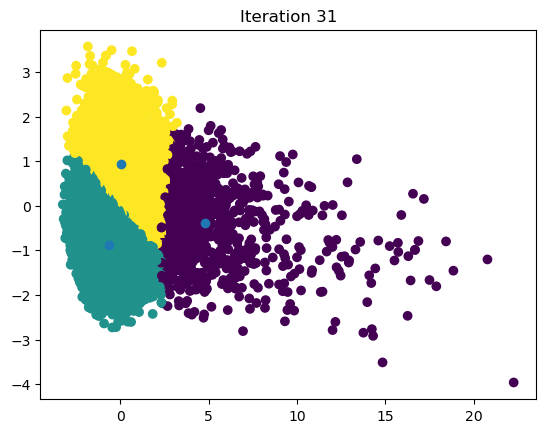

In [30]:

# Clustering with k = 3
get_result(3)


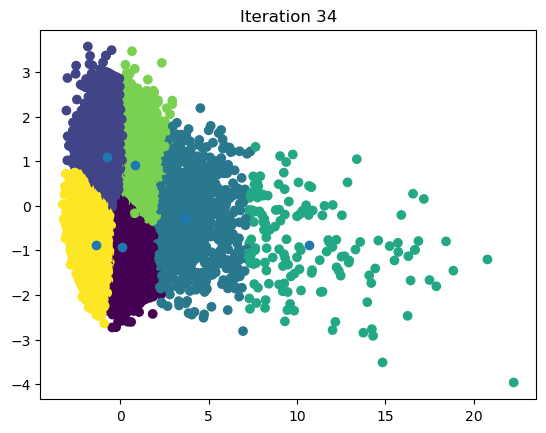

In [27]:

# Clustering with k = 7
get_result(7)

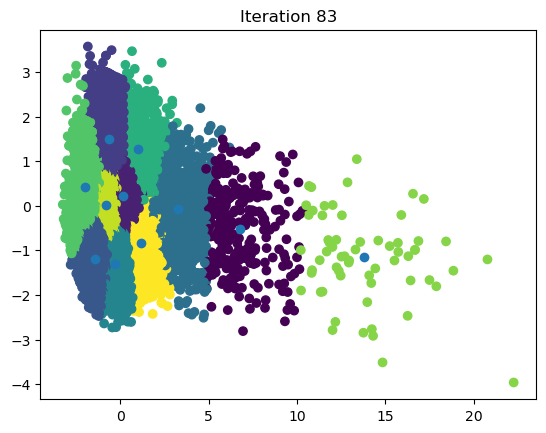

In [28]:
# Clustering with k = 12
get_result(12)

Text(0.5, 1.0, 'Total vs Age k-means k=7 clusters')

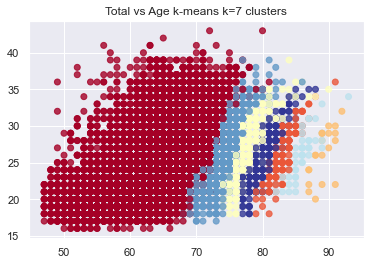

In [10]:
# Example of cluster Visualization